<a href="https://colab.research.google.com/github/ddodds42/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/DAVID_DODDS_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind, ttest_ind_from_stats, ttest_rel
from scipy.stats import chisquare
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')
print(df.shape)
df.head()

(434, 17)


,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [0]:
col_names = ['party', 'handicapped_infants', 'water_project', 'budget',
             'physician_fee_freeze', 'el_salvador_aid',
             'religious_groups_in_schools', 'anti_satellite_test_ban',
             'aid_nicaraguan_contras', 'mx_missile', 'immigration',
             'synfuels-corp-cutback', 'ed_spending', 'superfund_right_to_sue',
             'crime', 'duty_free_exports', 'south_africa']

In [4]:
df.columns = col_names
print(df.shape)
df.head()

(434, 17)


,party,handicapped_infants,water_project,budget,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_nicaraguan_contras,mx_missile,immigration,synfuels-corp-cutback,ed_spending,superfund_right_to_sue,crime,duty_free_exports,south_africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [5]:
df = df.replace({'?':np.NaN, 'n':0, 'y':1})
df.head()

,party,handicapped_infants,water_project,budget,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_nicaraguan_contras,mx_missile,immigration,synfuels-corp-cutback,ed_spending,superfund_right_to_sue,crime,duty_free_exports,south_africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
1,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
4,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [0]:
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [0]:
def conf_int(data, confidence = 0.95):
  array = np.array(data)
  mean = np.nanmean(array)
  n = len(array)
  stderr = (np.nanstd(array, ddof=1) / np.sqrt(n))
  t = stats.t.ppf((1+confidence) /2.0, n-1)
  moe = stderr * t
  # return (print('mean =', mean), print('95% min =', mean-moe),
  #         print('95% max =', mean+moe))
  return (mean, mean-moe, mean+moe, moe)

In [8]:
# Generate and numerically represent a confidence interval

# For the republican votes on this education spending bill, the mean support of
# a sample of the whole population of republican policymakers in the U.S. in
# 1984 will be between 81.8% support and 92.1% support 95% of the time.

conf_int(rep['ed_spending'])

(0.8701298701298701,
 0.8186035725411455,
 0.9216561677185947,
 0.051526297588724596)

In [9]:
rep_ed_spend = []

for i in rep['ed_spending'].notnull():
  rep_ed_spend.append(int(i))

rep_ed_spend

[1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

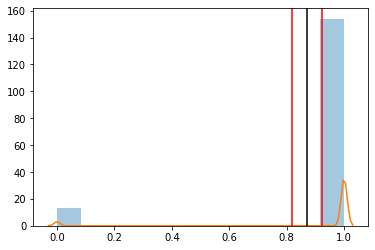

In [10]:
# Graphically (with a plot) represent the confidence interval. Had to inject
# kernel density kwargs into the distplots. I honestly have no idea what
# kde_kws means.

import seaborn as sns

sns.distplot(rep_ed_spend, kde=False)
# sns.kdeplot(rep['ed_spending'].values, bw=.01)
sns.distplot(rep_ed_spend, hist=False, kde_kws={'bw':0.01})
CI = conf_int(rep['ed_spending'])
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

In [0]:
# Interpret the confidence interval - what does it tell you about the data and
# its distribution?

# The conf. interval here means that in 20 random sample scenarios, the mean of
# only 1 of those scenarios will be outside of that 82% - 91% interval. I'd
# personally prefer an MOE of less than 3%, whereas this one is around 5%.

In [14]:
dfx = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(dfx.shape)
dfx.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
dfx.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [19]:
dfx['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [20]:
dfx['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [23]:
cont_tab = pd.crosstab(dfx['workclass'], dfx['education'], margins=True)

cont_tab

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
workclass,,,,,,,,,,,,,,,,,
Federal-gov,6,9,5,0,1,2,3,55,38,212,16,263,67,0,29,254,960
Local-gov,31,36,19,4,9,28,23,88,86,477,27,503,342,4,29,387,2093
Never-worked,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,2,7
Private,695,923,333,136,266,424,387,729,1005,3551,181,7780,894,41,257,5094,22696
Self-emp-inc,19,14,7,2,4,14,10,35,38,273,35,279,79,0,81,226,1116
Self-emp-not-inc,67,60,19,13,19,94,34,71,108,399,50,866,124,0,131,486,2541
State-gov,13,14,10,1,4,10,6,41,46,270,89,268,169,1,31,325,1298
Without-pay,0,0,0,0,0,1,0,1,0,0,0,9,0,0,0,3,14
All,833,1057,393,156,303,574,463,1020,1321,5182,398,9969,1675,46,558,6777,30725


In [31]:
row_sums = cont_tab.iloc[0:8, 16].values
col_sums = cont_tab.iloc[8, 0:16].values

print(row_sums)
print(col_sums)

[  960  2093     7 22696  1116  2541  1298    14]
[ 833 1057  393  156  303  574  463 1020 1321 5182  398 9969 1675   46
  558 6777]


In [32]:
total = cont_tab.loc['All','All']
total

30725

In [33]:
expected = []

for i in range(len(row_sums)):
  expected_row = []
  for cell in col_sums:
    expected_val = cell*row_sums[i] / total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(8, 16)
[[2.60270138e+01 3.30258747e+01 1.22792514e+01 4.87420667e+00
  9.46720911e+00 1.79345810e+01 1.44663954e+01 3.18698129e+01
  4.12745321e+01 1.61911147e+02 1.24354760e+01 3.11480553e+02
  5.23352319e+01 1.43726607e+00 1.74346623e+01 2.11746786e+02]
 [5.67443124e+01 7.20032872e+01 2.67713263e+01 1.06267860e+01
  2.06404882e+01 3.91011229e+01 3.15397559e+01 6.94828316e+01
  8.99870789e+01 3.53000033e+02 2.71119284e+01 6.79092498e+02
  1.14101709e+02 3.13353946e+00 3.80111961e+01 4.61652107e+02]
 [1.89780309e-01 2.40813670e-01 8.95362083e-02 3.55410903e-02
  6.90317331e-02 1.30772986e-01 1.05484133e-01 2.32384052e-01
  3.00960130e-01 1.18060212e+00 9.06753458e-02 2.27121237e+00
  3.81611066e-01 1.04800651e-02 1.27127746e-01 1.54398698e+00]
 [6.15321985e+02 7.80786721e+02 2.90301969e+02 1.15234369e+02
  2.23820602e+02 4.24003385e+02 3.42009699e+02 7.53455492e+02
  9.75798731e+02 3.82784937e+03 2.93995378e+02 7.36391941e+03
  1.23729211e+03 3.39793653e+01 4.12184475e+02 5.00604693e+

In [0]:
col_names = ['10th',	'11th',	'12th',	'1st-4th',	'5th-6th',	'7th-8th',
             '9th',	'Assoc-acdm',	'Assoc-voc',	'Bachelors',	'Doctorate',
             'HS-grad',	'Masters',	'Preschool',	'Prof-school',	'Some-college']

row_names = ['Fed', 'Local_Gov', 'Never_worked', 'Private', 'Self_Emp_Inc',
             'Self_Emp_No_Inc', 'State', 'w/o_pay']

In [39]:
exp_val_tab = pd.DataFrame(expected,
                           index=row_names,
                           columns=col_names)
print(exp_val_tab.shape)
exp_val_tab

(8, 16)


,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
Fed,26.027014,33.025875,12.279251,4.874207,9.467209,17.934581,14.466395,31.869813,41.274532,161.911147,12.435476,311.480553,52.335232,1.437266,17.434662,211.746786
Local_Gov,56.744312,72.003287,26.771326,10.626786,20.640488,39.101123,31.539756,69.482832,89.987079,353.000033,27.111928,679.092498,114.101709,3.133539,38.011196,461.652107
Never_worked,0.189780,0.240814,0.089536,0.035541,0.069032,0.130773,0.105484,0.232384,0.300960,1.180602,0.090675,2.271212,0.381611,0.010480,0.127128,1.543987
Private,615.321985,780.786721,290.301969,115.234369,223.820602,424.003385,342.009699,753.455492,975.798731,3827.849373,293.995378,7363.919414,1237.292107,33.979365,412.184475,5006.046932
Self_Emp_Inc,30.256404,38.392579,14.274630,5.666265,11.005631,20.848950,16.817185,37.048657,47.981644,188.221709,14.456241,362.096143,60.839707,1.670822,20.267795,246.155639
Self_Emp_No_Inc,68.890252,87.415362,32.501644,12.901416,25.058519,47.470594,38.290740,84.355411,109.248527,428.558568,32.915151,824.450090,138.524817,3.804264,46.147372,560.467274
State,35.190692,44.653735,16.602571,6.590334,12.800456,24.249048,19.559772,43.090643,55.806607,218.917364,16.813800,421.147665,70.761595,1.943303,23.573116,286.299300
w/o_pay,0.379561,0.481627,0.179072,0.071082,0.138063,0.261546,0.210968,0.464768,0.601920,2.361204,0.181351,4.542425,0.763222,0.020960,0.254255,3.087974


In [44]:
observed = pd.crosstab(dfx['workclass'], dfx['education']).values
print(observed.shape)
observed

(8, 16)


array([[   6,    9,    5,    0,    1,    2,    3,   55,   38,  212,   16,
         263,   67,    0,   29,  254],
       [  31,   36,   19,    4,    9,   28,   23,   88,   86,  477,   27,
         503,  342,    4,   29,  387],
       [   2,    1,    0,    0,    0,    1,    0,    0,    0,    0,    0,
           1,    0,    0,    0,    2],
       [ 695,  923,  333,  136,  266,  424,  387,  729, 1005, 3551,  181,
        7780,  894,   41,  257, 5094],
       [  19,   14,    7,    2,    4,   14,   10,   35,   38,  273,   35,
         279,   79,    0,   81,  226],
       [  67,   60,   19,   13,   19,   94,   34,   71,  108,  399,   50,
         866,  124,    0,  131,  486],
       [  13,   14,   10,    1,    4,   10,    6,   41,   46,  270,   89,
         268,  169,    1,   31,  325],
       [   0,    0,    0,    0,    0,    1,    0,    1,    0,    0,    0,
           9,    0,    0,    0,    3]])

In [51]:
chi_squared = ((observed - expected)**2/(expected)).sum() 

print("Chi-Squared:", chi_squared)

Chi-Squared: 2247.5388548117335


In [50]:
dof = (len(row_sums)-1)*(len(col_sums)-1)

print("Degrees of Freedom:", dof)

Degrees of Freedom: 105


In [53]:
# chi-squared test By hand using Numpy. Since the p-value of this chi-squared
# is next to 0, I can attribute dependance between the variables "working class"
# and 'education'.

from scipy.stats.distributions import chi2

print("P-value from chi^2 statistic:", chi2.sf(chi_squared, dof, scale=2))

P-value from chi^2 statistic: 3.779743842398438e-170


In [55]:
# chi-squared test In a single line using Scipy

chi_squared, p_value, dof, exp_table = stats.chi2_contingency(observed)

print("Chi-Squared:", chi_squared)
print("P-value", p_value)
print("Degrees of Freedom:", dof) 
print("Expected: \n", np.array(exp_table))

Chi-Squared: 2247.5388548117335
P-value 0.0
Degrees of Freedom: 105
Expected: 
 [[2.60270138e+01 3.30258747e+01 1.22792514e+01 4.87420667e+00
  9.46720911e+00 1.79345810e+01 1.44663954e+01 3.18698129e+01
  4.12745321e+01 1.61911147e+02 1.24354760e+01 3.11480553e+02
  5.23352319e+01 1.43726607e+00 1.74346623e+01 2.11746786e+02]
 [5.67443124e+01 7.20032872e+01 2.67713263e+01 1.06267860e+01
  2.06404882e+01 3.91011229e+01 3.15397559e+01 6.94828316e+01
  8.99870789e+01 3.53000033e+02 2.71119284e+01 6.79092498e+02
  1.14101709e+02 3.13353946e+00 3.80111961e+01 4.61652107e+02]
 [1.89780309e-01 2.40813670e-01 8.95362083e-02 3.55410903e-02
  6.90317331e-02 1.30772986e-01 1.05484133e-01 2.32384052e-01
  3.00960130e-01 1.18060212e+00 9.06753458e-02 2.27121237e+00
  3.81611066e-01 1.04800651e-02 1.27127746e-01 1.54398698e+00]
 [6.15321985e+02 7.80786721e+02 2.90301969e+02 1.15234369e+02
  2.23820602e+02 4.24003385e+02 3.42009699e+02 7.53455492e+02
  9.75798731e+02 3.82784937e+03 2.93995378e+02 7.

4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - In a single line using Scipy

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)